# 1. Notebook Setup

## 1.1 Import relevant packages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyodbc
import datetime
import random
import tensorflow as tf
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from nltk.tokenize import word_tokenize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.inspection import permutation_importance
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier, KerasRegressor

# 1.2 Pandas setup

In [ ]:
pd.set_option('display.max_columns', None)

## 1.3 Set Seed

In [ ]:
np.random.seed(0)
random.seed(0)
tf.random.set_seed(0)

# 2. SQL Connector

# 3. Load CSV File


In [ ]:
# Read the CSV file as a DataFrame
df = pd.read_csv("master_table.csv")
df

,ACCOUNTNUM,ClientName,bill_year,PartyType,FEESBILLEDGBP,HOURSBILLED,actual_next_year_bills_gbp,avg_TotalDocumentsCreated,number_of_ongoing_matters,number_of_new_matters,Aviation_ongoing,Banking_ongoing,Commercial_ongoing,Condor_ongoing,Corporate_ongoing,Design_ongoing,Employment_ongoing,Energy_ongoing,Financial Services_ongoing,Fundraising_ongoing,Insolvency_ongoing,Litigation_ongoing,M&A_ongoing,Media_ongoing,Medical Negligence_ongoing,Miscellaneous_ongoing,Non-Billable_ongoing,Patent_ongoing,Personal Injury_ongoing,Property_ongoing,Renewables_ongoing,Tax Compliance_ongoing,Tax Planning_ongoing,Telecoms_ongoing,Trademark_ongoing,Aviation_new,Banking_new,Commercial_new,Condor_new,Corporate_new,Design_new,Employment_new,Energy_new,Financial Services_new,Fundraising_new,Insolvency_new,Litigation_new,M&A_new,Media_new,Medical Negligence_new,Miscellaneous_new,Non-Billable_new,Patent_new,Personal Injury_new,Property_new,Renewables_new,Tax Compliance_new,Tax Planning_new,Telecoms_new,Trademark_new,number_of_ongoing_matters_types,number_of_new_matters_types,avg_E-MAIL,avg_DOC,avg_BILL,avg_LETTER,avg_ATTEND,avg_SPR,avg_FORM,avg_MEMO,avg_PROCEEDING,avg_MEDIA,avg_PRESENTATION,avg_BIBLE,avg_PUBLICATION,avg_BUS,avg_APPR,avg_TENDER,avg_POLICY,office_code
0,BE01-000030,Fieldfisher Partnerschaft von Rechtsanwälten m...,2018,Organization,14245.388960,121.1,25452.569563,37.277778,9,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,32.222222,4.500000,0.388889,0.000000,0.0,0.000000,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BE01
1,BE01-000030,Fieldfisher Partnerschaft von Rechtsanwälten m...,2019,Organization,25452.569563,76.8,2398.168500,37.277778,16,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,32.222222,4.500000,0.388889,0.000000,0.0,0.000000,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BE01
2,BE01-000030,Fieldfisher Partnerschaft von Rechtsanwälten m...,2020,Organization,2398.168500,0.0,0.000000,37.277778,14,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,25,32.222222,4.500000,0.388889,0.000000,0.0,0.000000,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BE01
3,BE01-000030,Fieldfisher Partnerschaft von Rechtsanwälten m...,2022,Organization,0.000000,0.0,0.000000,37.277778,15,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,32.222222,4.500000,0.388889,0.000000,0.0,0.000000,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BE01
4,BE01-000040,Fieldfisher France - ACC only,2018,Organization,52390.500269,320.8,321936.618666,121.108696,15,15,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,109.739130,10.413043,0.500000,0.130435,0.0,0.021739,0.0,0.108696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BE01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54716,US01-2000538,Clearspeed Inc.,2023,Organization,14322.302547,32.7,0.000000,84.000000,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.

In [ ]:
df

,ACCOUNTNUM,ClientName,bill_year,PartyType,FEESBILLEDGBP,HOURSBILLED,actual_next_year_bills_gbp,avg_TotalDocumentsCreated,number_of_ongoing_matters,number_of_new_matters,Aviation_ongoing,Banking_ongoing,Commercial_ongoing,Condor_ongoing,Corporate_ongoing,Design_ongoing,Employment_ongoing,Energy_ongoing,Financial Services_ongoing,Fundraising_ongoing,Insolvency_ongoing,Litigation_ongoing,M&A_ongoing,Media_ongoing,Medical Negligence_ongoing,Miscellaneous_ongoing,Non-Billable_ongoing,Patent_ongoing,Personal Injury_ongoing,Property_ongoing,Renewables_ongoing,Tax Compliance_ongoing,Tax Planning_ongoing,Telecoms_ongoing,Trademark_ongoing,Aviation_new,Banking_new,Commercial_new,Condor_new,Corporate_new,Design_new,Employment_new,Energy_new,Financial Services_new,Fundraising_new,Insolvency_new,Litigation_new,M&A_new,Media_new,Medical Negligence_new,Miscellaneous_new,Non-Billable_new,Patent_new,Personal Injury_new,Property_new,Renewables_new,Tax Compliance_new,Tax Planning_new,Telecoms_new,Trademark_new,number_of_ongoing_matters_types,number_of_new_matters_types,avg_E-MAIL,avg_DOC,avg_BILL,avg_LETTER,avg_ATTEND,avg_SPR,avg_FORM,avg_MEMO,avg_PROCEEDING,avg_MEDIA,avg_PRESENTATION,avg_BIBLE,avg_PUBLICATION,avg_BUS,avg_APPR,avg_TENDER,avg_POLICY,office_code
0,BE01-000030,Fieldfisher Partnerschaft von Rechtsanwälten m...,2018,Organization,14245.388960,121.1,25452.569563,37.277778,9,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,32.222222,4.500000,0.388889,0.000000,0.0,0.000000,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BE01
1,BE01-000030,Fieldfisher Partnerschaft von Rechtsanwälten m...,2019,Organization,25452.569563,76.8,2398.168500,37.277778,16,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,32.222222,4.500000,0.388889,0.000000,0.0,0.000000,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BE01
2,BE01-000030,Fieldfisher Partnerschaft von Rechtsanwälten m...,2020,Organization,2398.168500,0.0,0.000000,37.277778,14,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,25,32.222222,4.500000,0.388889,0.000000,0.0,0.000000,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BE01
3,BE01-000030,Fieldfisher Partnerschaft von Rechtsanwälten m...,2022,Organization,0.000000,0.0,0.000000,37.277778,15,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,32.222222,4.500000,0.388889,0.000000,0.0,0.000000,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BE01
4,BE01-000040,Fieldfisher France - ACC only,2018,Organization,52390.500269,320.8,321936.618666,121.108696,15,15,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,109.739130,10.413043,0.500000,0.130435,0.0,0.021739,0.0,0.108696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BE01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54716,US01-2000538,Clearspeed Inc.,2023,Organization,14322.302547,32.7,0.000000,84.000000,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.

# 4. Data Preprocessing

## 4.1 Drop identifer columns

In [ ]:
# Copy identifiers to a new dataframe
df_ids = df['ACCOUNTNUM'].copy()

# Drop identifiers from the original dataframe
df = df.drop(['ACCOUNTNUM', 'ClientName'], axis=1)


## 4.2 Check null values

In [ ]:
null_values = df.isnull().sum()
null_values = null_values[null_values > 0]
print(null_values)

Series([], dtype: int64)


## 4.3 Data Encoding

In [ ]:
df["PartyType"].unique()

array(['Organization', 'Person', 'LegalEntity'], dtype=object)

In [ ]:
# Create a dictionary for encoding
encoding_dict = {'Organization': 1, 'Person': 2, 'LegalEntity': 3}

# Encode 'PartyType' column
df['PartyType'] = df['PartyType'].replace(encoding_dict)

In [ ]:
df["office_code"].unique()

array(['BE01', 'DE01', 'DE02', 'DE03', 'FR01', 'LU01', 'NL01', 'UK01',
       'UK04', 'UK05', 'UK06', 'US01'], dtype=object)

In [ ]:
# Create a label (category) encoder object
le = LabelEncoder()

# Fit the encoder to the pandas column
le.fit(df['office_code'])

# Transform Categories Into Integers and assign back to 'office_code'
df['office_code'] = le.transform(df['office_code'])

# 5. PCA pre-testing

## 5.1 Split and Copy Dataset

In [ ]:
df_copy = df.copy()

In [ ]:
# Get the current year
current_year = datetime.datetime.now().year

# Exclude the rows for the current year
df_train = df_copy[df_copy['bill_year'] != current_year]

## 5.2 Train regression model pre-pca

MSE:  5419370243.373494
MAE:  22290.47114810818
R2 score:  0.580995322447134

In [ ]:
# Separate the features and the target variable
X = df_train.drop('actual_next_year_bills_gbp', axis=1)
y = df_train['actual_next_year_bills_gbp']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the regressor
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict the target variable
y_pred = regressor.predict(X_test)

# Print evaluation metrics
print("MSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("R2 score: ", r2_score(y_test, y_pred))

MSE:  5419370243.373494
MAE:  22290.47114810818
R2 score:  0.580995322447134


## 5.3 Find optimal number of components

Explained variance with 1 component(s): 0.99936704607941
Explained variance with 2 component(s): 0.9999456064965251
Explained variance with 3 component(s): 0.9999801434395831
Explained variance with 4 component(s): 0.9999994670941015
Explained variance with 5 component(s): 0.9999997168509341
Explained variance with 6 component(s): 0.999999827224327
Explained variance with 7 component(s): 0.9999999182430049
Explained variance with 8 component(s): 0.9999999469101375
Explained variance with 9 component(s): 0.9999999686931698
Explained variance with 10 component(s): 0.9999999775945889
Explained variance with 11 component(s): 0.9999999837814469
Explained variance with 12 component(s): 0.9999999880701974
Explained variance with 13 component(s): 0.9999999913784383
Explained variance with 14 component(s): 0.999999993371821
Explained variance with 15 component(s): 0.9999999945987194
Explained variance with 16 component(s): 0.999999995701088
Explained variance with 17 component(s): 0.99999999646

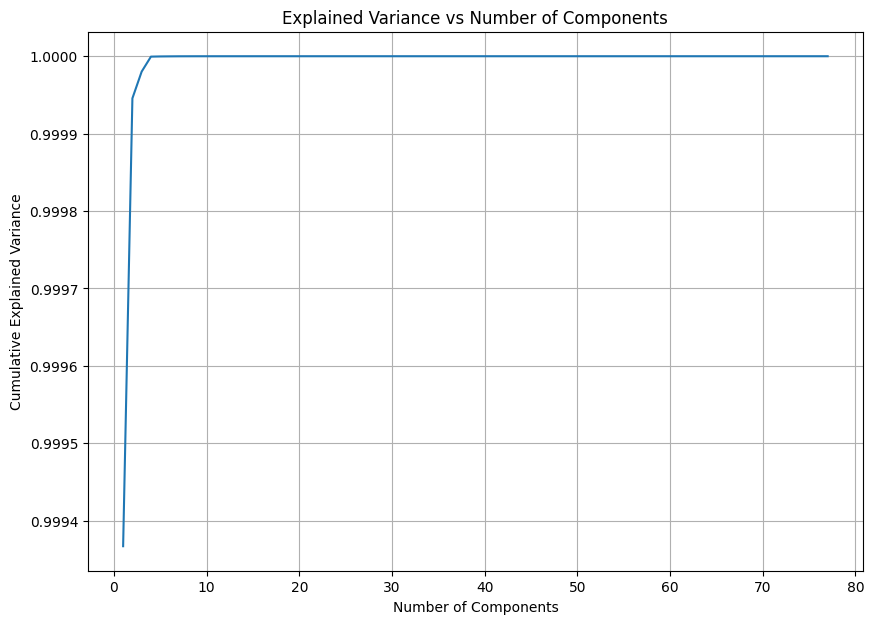

In [ ]:
# Fit PCA to the training data
pca = PCA()
pca.fit(X_train)

# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Print the explained variance for each number of components
for i, exp_var in enumerate(explained_variance):
    print("Explained variance with {} component(s): {}".format(i+1, np.sum(explained_variance[:i+1])))

# Plot the explained variance
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(explained_variance)+1), np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)

plt.savefig("0.11.Explained Variance vs Number of Components.png", dpi=300)

plt.show()

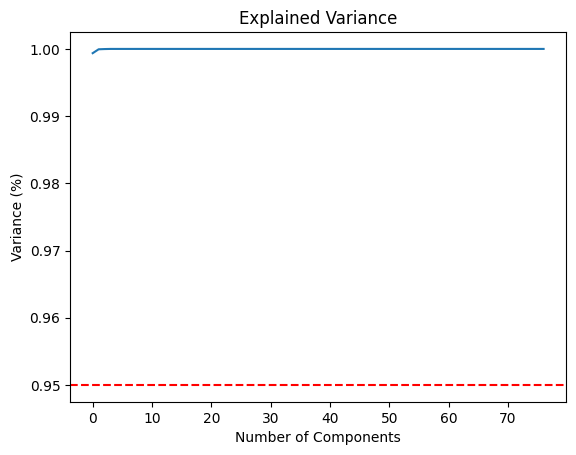

Optimal number of components:  1


In [ ]:
# Fit PCA on the training data
pca = PCA().fit(X_train)

# Plot cumulative explained variance and draw a dashed line at 0.95.
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--')

plt.savefig("0.12.Explained Variance.png", dpi=300)
plt.show()

# Find the number of components which explains 95% variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_optimal = np.where(cumulative_variance >= 0.95)[0][0] + 1

print("Optimal number of components: ", n_components_optimal)

## 5.4 Train regression model after-pca

MSE PCA:  6021351471.641994
MAE PCA:  21008.981175092224
R2 score PCA:  0.5344524698431921

In [ ]:
# Initialize PCA
pca = PCA(n_components=n_components_optimal)

# Fit PCA on the training set and transform both sets
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize and fit the regressor
regressor_pca = LinearRegression()
regressor_pca.fit(X_train_pca, y_train)

# Predict the target variable
y_pred_pca = regressor_pca.predict(X_test_pca)

# Print evaluation metrics
print("MSE PCA: ", mean_squared_error(y_test, y_pred_pca))
print("MAE PCA: ", mean_absolute_error(y_test, y_pred_pca))
print("R2 score PCA: ", r2_score(y_test, y_pred_pca))


MSE PCA:  6021351471.641994
MAE PCA:  21008.981175092224
R2 score PCA:  0.5344524698431921


# 6. Machine Learning Model

## 6.1 Linear Regression Model

- MSE:  5419370243.373494
- MAE:  22290.47114810818
- R2 score:  0.580995322447134

In [ ]:
# Initialize and fit the regressor
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict the target variable
y_pred = regressor.predict(X_test)

# Print evaluation metrics
print("MSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("R2 score: ", r2_score(y_test, y_pred))

MSE:  5419370243.373494
MAE:  22290.47114810818
R2 score:  0.580995322447134


## 6.2 Random Forest Model

### 6.2.1 Base Model

- MSE Random Forest:  6029242937.751056
- MAE Random Forest:  16877.788971265953
- R2 score Random Forest:  0.5338423323061804

In [ ]:
# Initialize and fit the RandomForestRegressor
forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
forest_regressor.fit(X_train, y_train)

# Predict the target variable
y_pred_rf = forest_regressor.predict(X_test)

# Print evaluation metrics
print("MSE Random Forest: ", mean_squared_error(y_test, y_pred_rf))
print("MAE Random Forest: ", mean_absolute_error(y_test, y_pred_rf))
print("R2 score Random Forest: ", r2_score(y_test, y_pred_rf))

MSE Random Forest:  6029242937.751056
MAE Random Forest:  16877.788971265953
R2 score Random Forest:  0.5338423323061804


### 6.2.2 Finetuned Model

24 combination:
- Best parameters found:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
- MSE Random Forest (best parameters):  5517043870.256833
- MAE Random Forest (best parameters):  16579.77532163535
- R2 score Random Forest (best parameters):  0.5734435766353925

In [ ]:
"""
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Initialize the RandomForestRegressor
forest_regressor = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=forest_regressor, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Predict the target variable using the best estimator
y_pred_rf_gs = grid_search.best_estimator_.predict(X_test)

# Print evaluation metrics
print("MSE Random Forest (GridSearchCV): ", mean_squared_error(y_test, y_pred_rf_gs))
print("MAE Random Forest (GridSearchCV): ", mean_absolute_error(y_test, y_pred_rf_gs))
print("R2 score Random Forest (GridSearchCV): ", r2_score(y_test, y_pred_rf_gs))
"""

'\n# Define the parameter grid\nparam_grid = {\n    \'n_estimators\': [50, 100],\n    \'max_depth\': [None, 10, 20],\n    \'min_samples_split\': [2, 5],\n    \'min_samples_leaf\': [1, 2],\n}\n\n# Initialize the RandomForestRegressor\nforest_regressor = RandomForestRegressor(random_state=42)\n\n# Initialize GridSearchCV\ngrid_search = GridSearchCV(estimator=forest_regressor, param_grid=param_grid, cv=3, scoring=\'neg_mean_squared_error\')\n\n# Fit GridSearchCV\ngrid_search.fit(X_train, y_train)\n\n# Print the best parameters\nprint("Best parameters found: ", grid_search.best_params_)\n\n# Predict the target variable using the best estimator\ny_pred_rf_gs = grid_search.best_estimator_.predict(X_test)\n\n# Print evaluation metrics\nprint("MSE Random Forest (GridSearchCV): ", mean_squared_error(y_test, y_pred_rf_gs))\nprint("MAE Random Forest (GridSearchCV): ", mean_absolute_error(y_test, y_pred_rf_gs))\nprint("R2 score Random Forest (GridSearchCV): ", r2_score(y_test, y_pred_rf_gs))\n'

In [ ]:
# Initialize and fit the RandomForestRegressor with the best parameters
best_forest_regressor = RandomForestRegressor(
    n_estimators=50,
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=2,
    random_state=42
)
best_forest_regressor.fit(X_train, y_train)

# Predict the target variable
y_pred_rf_best = best_forest_regressor.predict(X_test)

# Print evaluation metrics
print("MSE Random Forest (best parameters): ", mean_squared_error(y_test, y_pred_rf_best))
print("MAE Random Forest (best parameters): ", mean_absolute_error(y_test, y_pred_rf_best))
print("R2 score Random Forest (best parameters): ", r2_score(y_test, y_pred_rf_best))


MSE Random Forest (best parameters):  5517043870.256833
MAE Random Forest (best parameters):  16579.77532163535
R2 score Random Forest (best parameters):  0.5734435766353925


## 6.3 Forward Feed Model

### 6.3.1 Base Model

- MSE Feedforward NN:  4624675299.620946
- MAE Feedforward NN:  19451.542802835967
- R2 score Feedforward NN:  0.6424380517138933

In [ ]:
# Define model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='linear'))  # Output layer

# Compile model
model.compile(loss='mean_squared_error', optimizer=Adam(), metrics=['mean_absolute_error'])

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test, y_test))

# Predict the target variable
y_pred_nn = model.predict(X_test)

# Print evaluation metrics
print("MSE Feedforward NN: ", mean_squared_error(y_test, y_pred_nn))
print("MAE Feedforward NN: ", mean_absolute_error(y_test, y_pred_nn))
print("R2 score Feedforward NN: ", r2_score(y_test, y_pred_nn))


Epoch 1/50
1210/1210 [==============================] - 4s 2ms/step - loss: 10437042176.0000 - mean_absolute_error: 21298.5410 - val_loss: 6474688000.0000 - val_mean_absolute_error: 21475.2773
Epoch 2/50
1210/1210 [==============================] - 3s 2ms/step - loss: 8819126272.0000 - mean_absolute_error: 21106.9043 - val_loss: 4686177280.0000 - val_mean_absolute_error: 18740.4004
Epoch 3/50
1210/1210 [==============================] - 3s 2ms/step - loss: 14611998720.0000 - mean_absolute_error: 22928.9219 - val_loss: 5178170368.0000 - val_mean_absolute_error: 19609.3535
Epoch 4/50
1210/1210 [==============================] - 3s 2ms/step - loss: 8817404928.0000 - mean_absolute_error: 21676.7637 - val_loss: 4980195328.0000 - val_mean_absolute_error: 18262.2246
Epoch 5/50
1210/1210 [==============================] - 3s 2ms/step - loss: 8196990464.0000 - mean_absolute_error: 21007.8418 - val_loss: 5994578944.0000 - val_mean_absolute_error: 20799.8184
Epoch 6/50
1210/1210 [================

1210/1210 [==============================] - 2s 2ms/step - loss: 7465985024.0000 - mean_absolute_error: 20177.9707 - val_loss: 4624300544.0000 - val_mean_absolute_error: 18883.8301
Epoch 44/50
1210/1210 [==============================] - 2s 2ms/step - loss: 6754070528.0000 - mean_absolute_error: 20268.5039 - val_loss: 4564028928.0000 - val_mean_absolute_error: 19284.8398
Epoch 45/50
1210/1210 [==============================] - 2s 2ms/step - loss: 7176700416.0000 - mean_absolute_error: 20350.3691 - val_loss: 5668894720.0000 - val_mean_absolute_error: 20616.4258
Epoch 46/50
1210/1210 [==============================] - 3s 2ms/step - loss: 6966110208.0000 - mean_absolute_error: 20700.9551 - val_loss: 4612909056.0000 - val_mean_absolute_error: 18896.0059
Epoch 47/50
1210/1210 [==============================] - 2s 2ms/step - loss: 7683543040.0000 - mean_absolute_error: 20566.7969 - val_loss: 4503284224.0000 - val_mean_absolute_error: 17879.9648
Epoch 48/50
1210/1210 [========================

### 6.3.2 Finetuned Model

Best: -5932651520.000000 using {'batch_size': 10, 'learn_rate': 0.01, 'neurons': 5}

- MSE Feedforward NN:  122922735622.91176
- MAE Feedforward NN:  72181.18900789684
- R2 score Feedforward NN:  -8.503908921257418

In [ ]:
"""
# Function to create model, required for KerasRegressor
def create_model(learn_rate=0.01, neurons=1):
    # define model
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))  # Input layer
    model.add(Dense(1, activation='linear'))  # Output layer

    # Define optimizer
    optimizer = Adam(learning_rate=learn_rate)

    # Compile model
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_absolute_error'])

    return model

# Create the KerasRegressor
model = KerasRegressor(build_fn=create_model, epochs=50, verbose=0)

# Define the grid search parameters
batch_size = [10, 50]  # 2 options
learn_rate = [0.001, 0.01, 0.1]  # 3 options
neurons = [1, 5, 10, 15]  # 4 options
param_grid = dict(batch_size=batch_size, learn_rate=learn_rate, neurons=neurons)

# Perform GridSearch
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)  # Removed the callbacks argument

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
"""

'\n# Function to create model, required for KerasRegressor\ndef create_model(learn_rate=0.01, neurons=1):\n    # define model\n    model = Sequential()\n    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=\'relu\'))  # Input layer\n    model.add(Dense(1, activation=\'linear\'))  # Output layer\n    \n    # Define optimizer\n    optimizer = Adam(learning_rate=learn_rate)\n    \n    # Compile model\n    model.compile(loss=\'mean_squared_error\', optimizer=optimizer, metrics=[\'mean_absolute_error\'])\n    \n    return model\n\n# Create the KerasRegressor\nmodel = KerasRegressor(build_fn=create_model, epochs=50, verbose=0)\n\n# Define the grid search parameters\nbatch_size = [10, 50]  # 2 options\nlearn_rate = [0.001, 0.01, 0.1]  # 3 options\nneurons = [1, 5, 10, 15]  # 4 options\nparam_grid = dict(batch_size=batch_size, learn_rate=learn_rate, neurons=neurons)\n\n# Perform GridSearch\ngrid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)\ngrid_result

In [ ]:
# Function to create model, required for KerasRegressor
def create_model():
    # define model
    model = Sequential()
    model.add(Dense(15, input_dim=X_train.shape[1], activation='relu'))  # Input layer with the best neurons value
    model.add(Dense(1, activation='linear'))  # Output layer

    # Define optimizer with the best learn_rate
    optimizer = Adam(learning_rate=0.01)

    # Compile model
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_absolute_error'])

    return model

# Create the model with best parameters
model = create_model()

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train model with best batch_size
history = model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Predict the target variable
y_pred_nn = model.predict(X_test)

# Print evaluation metrics
print("MSE Feedforward NN: ", mean_squared_error(y_test, y_pred_nn))
print("MAE Feedforward NN: ", mean_absolute_error(y_test, y_pred_nn))
print("R2 score Feedforward NN: ", r2_score(y_test, y_pred_nn))

Epoch 1/50
3871/3871 [==============================] - 8s 2ms/step - loss: 12859710464.0000 - mean_absolute_error: 21420.2930 - val_loss: 6238841344.0000 - val_mean_absolute_error: 20482.4453
Epoch 2/50
3871/3871 [==============================] - 7s 2ms/step - loss: 11606888448.0000 - mean_absolute_error: 20348.9609 - val_loss: 4724192256.0000 - val_mean_absolute_error: 21629.4004
Epoch 3/50
3871/3871 [==============================] - 7s 2ms/step - loss: 16865289216.0000 - mean_absolute_error: 24975.4141 - val_loss: 4742872576.0000 - val_mean_absolute_error: 18351.9082
Epoch 4/50
3871/3871 [==============================] - 7s 2ms/step - loss: 19265411072.0000 - mean_absolute_error: 30975.9531 - val_loss: 91885002752.0000 - val_mean_absolute_error: 61924.9141
Epoch 5/50
303/303 [==============================] - 0s 1ms/step
MSE Feedforward NN:  122922735622.91176
MAE Feedforward NN:  72181.18900789684
R2 score Feedforward NN:  -8.503908921257418


## 6.4 Support Vector Machine

### 6.4.1 Base Model

- MSE SVM:  13286063952.294634
- MAE SVM:  19976.742323067807
- R2 score SVM:  -0.02722690871414346

In [ ]:
"""
# Initialize and fit the Support Vector Regressor
svm_regressor = SVR(kernel='rbf', C=1e3, gamma=0.1)
svm_regressor.fit(X_train, y_train)

# Predict the target variable
y_pred_svr = svm_regressor.predict(X_test)

# Print evaluation metrics
print("MSE SVM: ", mean_squared_error(y_test, y_pred_svr))
print("MAE SVM: ", mean_absolute_error(y_test, y_pred_svr))
print("R2 score SVM: ", r2_score(y_test, y_pred_svr))
"""

'\n# Initialize and fit the Support Vector Regressor\nsvm_regressor = SVR(kernel=\'rbf\', C=1e3, gamma=0.1) \nsvm_regressor.fit(X_train, y_train)\n\n# Predict the target variable\ny_pred_svr = svm_regressor.predict(X_test)\n\n# Print evaluation metrics\nprint("MSE SVM: ", mean_squared_error(y_test, y_pred_svr))\nprint("MAE SVM: ", mean_absolute_error(y_test, y_pred_svr))\nprint("R2 score SVM: ", r2_score(y_test, y_pred_svr))\n'

- MSE SVM:  12733334738.247852
- MAE SVM:  18289.74781241242
- R2 score SVM:  0.01550796927078546

In [ ]:
"""
# Create a StandardScaler instance
scaler = StandardScaler()

# Initialize the Support Vector Regressor
svm_regressor = SVR(kernel='rbf', C=1e3, gamma=0.1)

# Create a pipeline that first scales the data then fits the model
pipeline = make_pipeline(scaler, svm_regressor)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict the target variable
y_pred_svr = pipeline.predict(X_test)

# Print evaluation metrics
print("MSE SVM: ", mean_squared_error(y_test, y_pred_svr))
print("MAE SVM: ", mean_absolute_error(y_test, y_pred_svr))
print("R2 score SVM: ", r2_score(y_test, y_pred_svr))
"""

'\n# Create a StandardScaler instance\nscaler = StandardScaler()\n\n# Initialize the Support Vector Regressor\nsvm_regressor = SVR(kernel=\'rbf\', C=1e3, gamma=0.1) \n\n# Create a pipeline that first scales the data then fits the model\npipeline = make_pipeline(scaler, svm_regressor)\n\n# Fit the pipeline on the training data\npipeline.fit(X_train, y_train)\n\n# Predict the target variable\ny_pred_svr = pipeline.predict(X_test)\n\n# Print evaluation metrics\nprint("MSE SVM: ", mean_squared_error(y_test, y_pred_svr))\nprint("MAE SVM: ", mean_absolute_error(y_test, y_pred_svr))\nprint("R2 score SVM: ", r2_score(y_test, y_pred_svr))\n'

# 7. Result Analysis

## 7.1 Forward Feed Result Analysis

Base Model:
- MSE Feedforward NN:  4676463704.974483
- MAE Feedforward NN:  18810.711594380216
- R2 score Feedforward NN:  0.6384339731749398

In [ ]:
# Define model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='linear'))  # Output layer

# Compile model
model.compile(loss='mean_squared_error', optimizer=Adam(), metrics=['mean_absolute_error'])

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test, y_test))

# Predict the target variable
y_pred_nn = model.predict(X_test)

# Print evaluation metrics
print("MSE Feedforward NN: ", mean_squared_error(y_test, y_pred_nn))
print("MAE Feedforward NN: ", mean_absolute_error(y_test, y_pred_nn))
print("R2 score Feedforward NN: ", r2_score(y_test, y_pred_nn))

Epoch 1/50
1210/1210 [==============================] - 3s 2ms/step - loss: 10843536384.0000 - mean_absolute_error: 21562.3633 - val_loss: 7443021824.0000 - val_mean_absolute_error: 23349.9277
Epoch 2/50
1210/1210 [==============================] - 3s 2ms/step - loss: 9062465536.0000 - mean_absolute_error: 21483.3379 - val_loss: 5014487552.0000 - val_mean_absolute_error: 21275.7793
Epoch 3/50
1210/1210 [==============================] - 3s 2ms/step - loss: 16056817664.0000 - mean_absolute_error: 23574.3574 - val_loss: 5304096256.0000 - val_mean_absolute_error: 19416.0645
Epoch 4/50
1210/1210 [==============================] - 3s 2ms/step - loss: 9399345152.0000 - mean_absolute_error: 23137.3105 - val_loss: 4852453888.0000 - val_mean_absolute_error: 19948.4395
Epoch 5/50
1210/1210 [==============================] - 3s 2ms/step - loss: 10110434304.0000 - mean_absolute_error: 22603.9941 - val_loss: 11315881984.0000 - val_mean_absolute_error: 21632.8574
Epoch 6/50
1210/1210 [==============

1210/1210 [==============================] - 3s 2ms/step - loss: 8529494016.0000 - mean_absolute_error: 20200.9414 - val_loss: 4994168320.0000 - val_mean_absolute_error: 19550.0059
Epoch 44/50
1210/1210 [==============================] - 2s 2ms/step - loss: 6359859200.0000 - mean_absolute_error: 19762.6660 - val_loss: 4746677248.0000 - val_mean_absolute_error: 19414.8066
Epoch 45/50
1210/1210 [==============================] - 2s 2ms/step - loss: 8251374592.0000 - mean_absolute_error: 22016.1094 - val_loss: 6314217984.0000 - val_mean_absolute_error: 19980.8906
Epoch 46/50
1210/1210 [==============================] - 2s 2ms/step - loss: 7387414528.0000 - mean_absolute_error: 20595.4316 - val_loss: 4916762624.0000 - val_mean_absolute_error: 17422.3496
Epoch 47/50
1210/1210 [==============================] - 2s 2ms/step - loss: 8523419648.0000 - mean_absolute_error: 20399.0547 - val_loss: 4869881856.0000 - val_mean_absolute_error: 17088.0938
Epoch 48/50
1210/1210 [========================

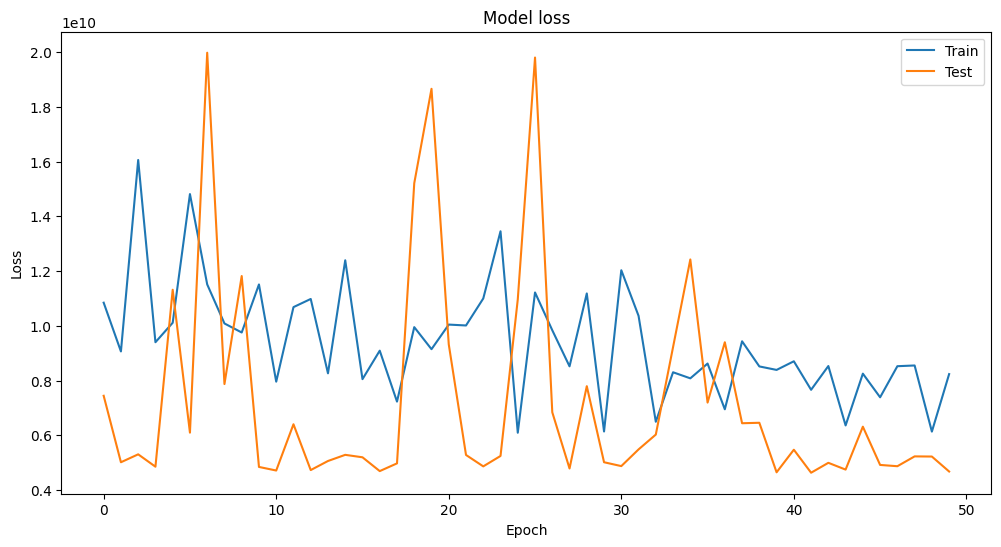

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

plt.savefig("0.13.Model Loss.png", dpi=300)

plt.show()

Epochs 2
- MSE Feedforward NN:  5096718353.715292
- MAE Feedforward NN:  19503.0977070166
- R2 score Feedforward NN:  0.6059415145168425

In [ ]:
"""
# Define model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='linear'))  # Output layer

# Compile model
model.compile(loss='mean_squared_error', optimizer=Adam(), metrics=['mean_absolute_error'])

# Train model
history = model.fit(X_train, y_train, epochs=2, batch_size=32, verbose=1, validation_data=(X_test, y_test))

# Predict the target variable
y_pred_nn = model.predict(X_test)

# Print evaluation metrics
print("MSE Feedforward NN: ", mean_squared_error(y_test, y_pred_nn))
print("MAE Feedforward NN: ", mean_absolute_error(y_test, y_pred_nn))
print("R2 score Feedforward NN: ", r2_score(y_test, y_pred_nn))
"""

'\n# Define model\nmodel = Sequential()\nmodel.add(Dense(64, input_dim=X_train.shape[1], activation=\'relu\'))  # Input layer\nmodel.add(Dense(32, activation=\'relu\'))  # Hidden layer\nmodel.add(Dense(1, activation=\'linear\'))  # Output layer\n\n# Compile model\nmodel.compile(loss=\'mean_squared_error\', optimizer=Adam(), metrics=[\'mean_absolute_error\'])\n\n# Train model\nhistory = model.fit(X_train, y_train, epochs=2, batch_size=32, verbose=1, validation_data=(X_test, y_test))\n\n# Predict the target variable\ny_pred_nn = model.predict(X_test)\n\n# Print evaluation metrics\nprint("MSE Feedforward NN: ", mean_squared_error(y_test, y_pred_nn))\nprint("MAE Feedforward NN: ", mean_absolute_error(y_test, y_pred_nn))\nprint("R2 score Feedforward NN: ", r2_score(y_test, y_pred_nn))\n'

Epoch 100:
- MSE Feedforward NN:  13525847480.228191
- MAE Feedforward NN:  24389.703019673587
- R2 score Feedforward NN:  -0.04576604062289946

In [ ]:
"""
# Define model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='linear'))  # Output layer

# Compile model
model.compile(loss='mean_squared_error', optimizer=Adam(), metrics=['mean_absolute_error'])

# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test, y_test))

# Predict the target variable
y_pred_nn = model.predict(X_test)

# Print evaluation metrics
print("MSE Feedforward NN: ", mean_squared_error(y_test, y_pred_nn))
print("MAE Feedforward NN: ", mean_absolute_error(y_test, y_pred_nn))
print("R2 score Feedforward NN: ", r2_score(y_test, y_pred_nn))
"""

'\n# Define model\nmodel = Sequential()\nmodel.add(Dense(64, input_dim=X_train.shape[1], activation=\'relu\'))  # Input layer\nmodel.add(Dense(32, activation=\'relu\'))  # Hidden layer\nmodel.add(Dense(1, activation=\'linear\'))  # Output layer\n\n# Compile model\nmodel.compile(loss=\'mean_squared_error\', optimizer=Adam(), metrics=[\'mean_absolute_error\'])\n\n# Train model\nhistory = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test, y_test))\n\n# Predict the target variable\ny_pred_nn = model.predict(X_test)\n\n# Print evaluation metrics\nprint("MSE Feedforward NN: ", mean_squared_error(y_test, y_pred_nn))\nprint("MAE Feedforward NN: ", mean_absolute_error(y_test, y_pred_nn))\nprint("R2 score Feedforward NN: ", r2_score(y_test, y_pred_nn))\n'

## 7.2 Model prediction

In [ ]:
# Define model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='linear'))  # Output layer

# Compile model
model.compile(loss='mean_squared_error', optimizer=Adam(), metrics=['mean_absolute_error'])

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test, y_test))

# Predict the target variable
y_pred_nn = model.predict(X_test)

# Print evaluation metrics
print("MSE Feedforward NN: ", mean_squared_error(y_test, y_pred_nn))
print("MAE Feedforward NN: ", mean_absolute_error(y_test, y_pred_nn))
print("R2 score Feedforward NN: ", r2_score(y_test, y_pred_nn))

Epoch 1/50
1210/1210 [==============================] - 3s 2ms/step - loss: 11135612928.0000 - mean_absolute_error: 21535.9199 - val_loss: 6031694848.0000 - val_mean_absolute_error: 21214.5645
Epoch 2/50
1210/1210 [==============================] - 2s 2ms/step - loss: 8707969024.0000 - mean_absolute_error: 21721.6230 - val_loss: 5096717312.0000 - val_mean_absolute_error: 19503.0996
Epoch 3/50
1210/1210 [==============================] - 3s 2ms/step - loss: 12579002368.0000 - mean_absolute_error: 22514.0215 - val_loss: 5290571264.0000 - val_mean_absolute_error: 19820.3613
Epoch 4/50
1210/1210 [==============================] - 2s 2ms/step - loss: 9616780288.0000 - mean_absolute_error: 22264.9414 - val_loss: 5133325312.0000 - val_mean_absolute_error: 18877.6914
Epoch 5/50
1210/1210 [==============================] - 2s 2ms/step - loss: 9150668800.0000 - mean_absolute_error: 21396.5293 - val_loss: 4710370816.0000 - val_mean_absolute_error: 18076.9160
Epoch 6/50
1210/1210 [================

1210/1210 [==============================] - 2s 2ms/step - loss: 9432152064.0000 - mean_absolute_error: 20083.8340 - val_loss: 4632050688.0000 - val_mean_absolute_error: 19978.6895
Epoch 44/50
1210/1210 [==============================] - 2s 2ms/step - loss: 6545659904.0000 - mean_absolute_error: 19663.5898 - val_loss: 4744194560.0000 - val_mean_absolute_error: 19623.9199
Epoch 45/50
1210/1210 [==============================] - 2s 2ms/step - loss: 8000040448.0000 - mean_absolute_error: 20379.1660 - val_loss: 6032155648.0000 - val_mean_absolute_error: 19834.5156
Epoch 46/50
1210/1210 [==============================] - 2s 2ms/step - loss: 6950176768.0000 - mean_absolute_error: 20576.2910 - val_loss: 5750701056.0000 - val_mean_absolute_error: 17957.1133
Epoch 47/50
1210/1210 [==============================] - 2s 2ms/step - loss: 8637070336.0000 - mean_absolute_error: 20675.0430 - val_loss: 4697939968.0000 - val_mean_absolute_error: 17469.3418
Epoch 48/50
1210/1210 [========================

In [ ]:
# Create a copy of the dataframe, excluding the target variable
df_copy_pred = df_copy.drop(columns='actual_next_year_bills_gbp')

# Generate predictions
y_pred_entire_dataset = model.predict(df_copy_pred)

# Convert predictions to a pandas Series (or DataFrame) if they're not already
# This is necessary because often the output from model.predict is a numpy array
y_pred_entire_dataset = pd.Series(y_pred_entire_dataset.flatten())

# Add predictions to original dataframe
df_copy['predicted_next_year_bills_gbp'] = y_pred_entire_dataset

1711/1711 [==============================] - 2s 1ms/step


In [ ]:
df_copy

,bill_year,PartyType,FEESBILLEDGBP,HOURSBILLED,actual_next_year_bills_gbp,avg_TotalDocumentsCreated,number_of_ongoing_matters,number_of_new_matters,Aviation_ongoing,Banking_ongoing,Commercial_ongoing,Condor_ongoing,Corporate_ongoing,Design_ongoing,Employment_ongoing,Energy_ongoing,Financial Services_ongoing,Fundraising_ongoing,Insolvency_ongoing,Litigation_ongoing,M&A_ongoing,Media_ongoing,Medical Negligence_ongoing,Miscellaneous_ongoing,Non-Billable_ongoing,Patent_ongoing,Personal Injury_ongoing,Property_ongoing,Renewables_ongoing,Tax Compliance_ongoing,Tax Planning_ongoing,Telecoms_ongoing,Trademark_ongoing,Aviation_new,Banking_new,Commercial_new,Condor_new,Corporate_new,Design_new,Employment_new,Energy_new,Financial Services_new,Fundraising_new,Insolvency_new,Litigation_new,M&A_new,Media_new,Medical Negligence_new,Miscellaneous_new,Non-Billable_new,Patent_new,Personal Injury_new,Property_new,Renewables_new,Tax Compliance_new,Tax Planning_new,Telecoms_new,Trademark_new,number_of_ongoing_matters_types,number_of_new_matters_types,avg_E-MAIL,avg_DOC,avg_BILL,avg_LETTER,avg_ATTEND,avg_SPR,avg_FORM,avg_MEMO,avg_PROCEEDING,avg_MEDIA,avg_PRESENTATION,avg_BIBLE,avg_PUBLICATION,avg_BUS,avg_APPR,avg_TENDER,avg_POLICY,office_code,predicted_next_year_bills_gbp
0,2018,1,14245.388960,121.1,25452.569563,37.277778,9,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,32.222222,4.500000,0.388889,0.000000,0.0,0.000000,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,12695.490234
1,2019,1,25452.569563,76.8,2398.168500,37.277778,16,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,32.222222,4.500000,0.388889,0.000000,0.0,0.000000,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,15097.881836
2,2020,1,2398.168500,0.0,0.000000,37.277778,14,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,25,32.222222,4.500000,0.388889,0.000000,0.0,0.000000,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1219.393188
3,2022,1,0.000000,0.0,0.000000,37.277778,15,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,32.222222,4.500000,0.388889,0.000000,0.0,0.000000,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4081.525391
4,2018,1,52390.500269,320.8,321936.618666,121.108696,15,15,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,109.739130,10.413043,0.500000,0.130435,0.0,0.021739,0.0,0.108696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,44901.296875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54716,2023,1,14322.302547,32.7,0.000000,84.000000,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,73.000000,3.000000,4.000000,3.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,7340.872559
54717,2023,1,9228.568806,24.9,0.000000,45.000000,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

## 7.3 Prediction Evaluation

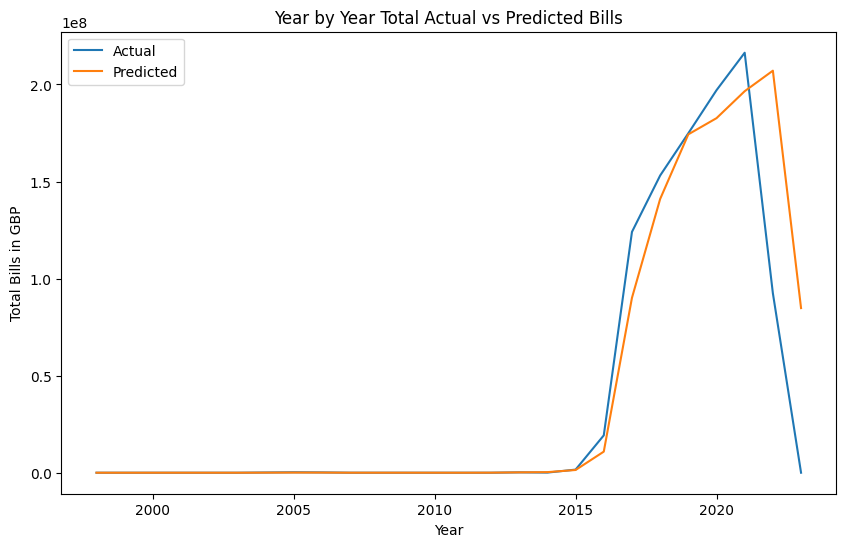

In [ ]:
# Sum data by 'bill_year'
grouped_df = df_copy.groupby('bill_year').sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(grouped_df['bill_year'], grouped_df['actual_next_year_bills_gbp'], label='Actual')
plt.plot(grouped_df['bill_year'], grouped_df['predicted_next_year_bills_gbp'], label='Predicted')
plt.xlabel('Year')
plt.ylabel('Total Bills in GBP')
plt.title('Year by Year Total Actual vs Predicted Bills')
plt.legend()

plt.show()

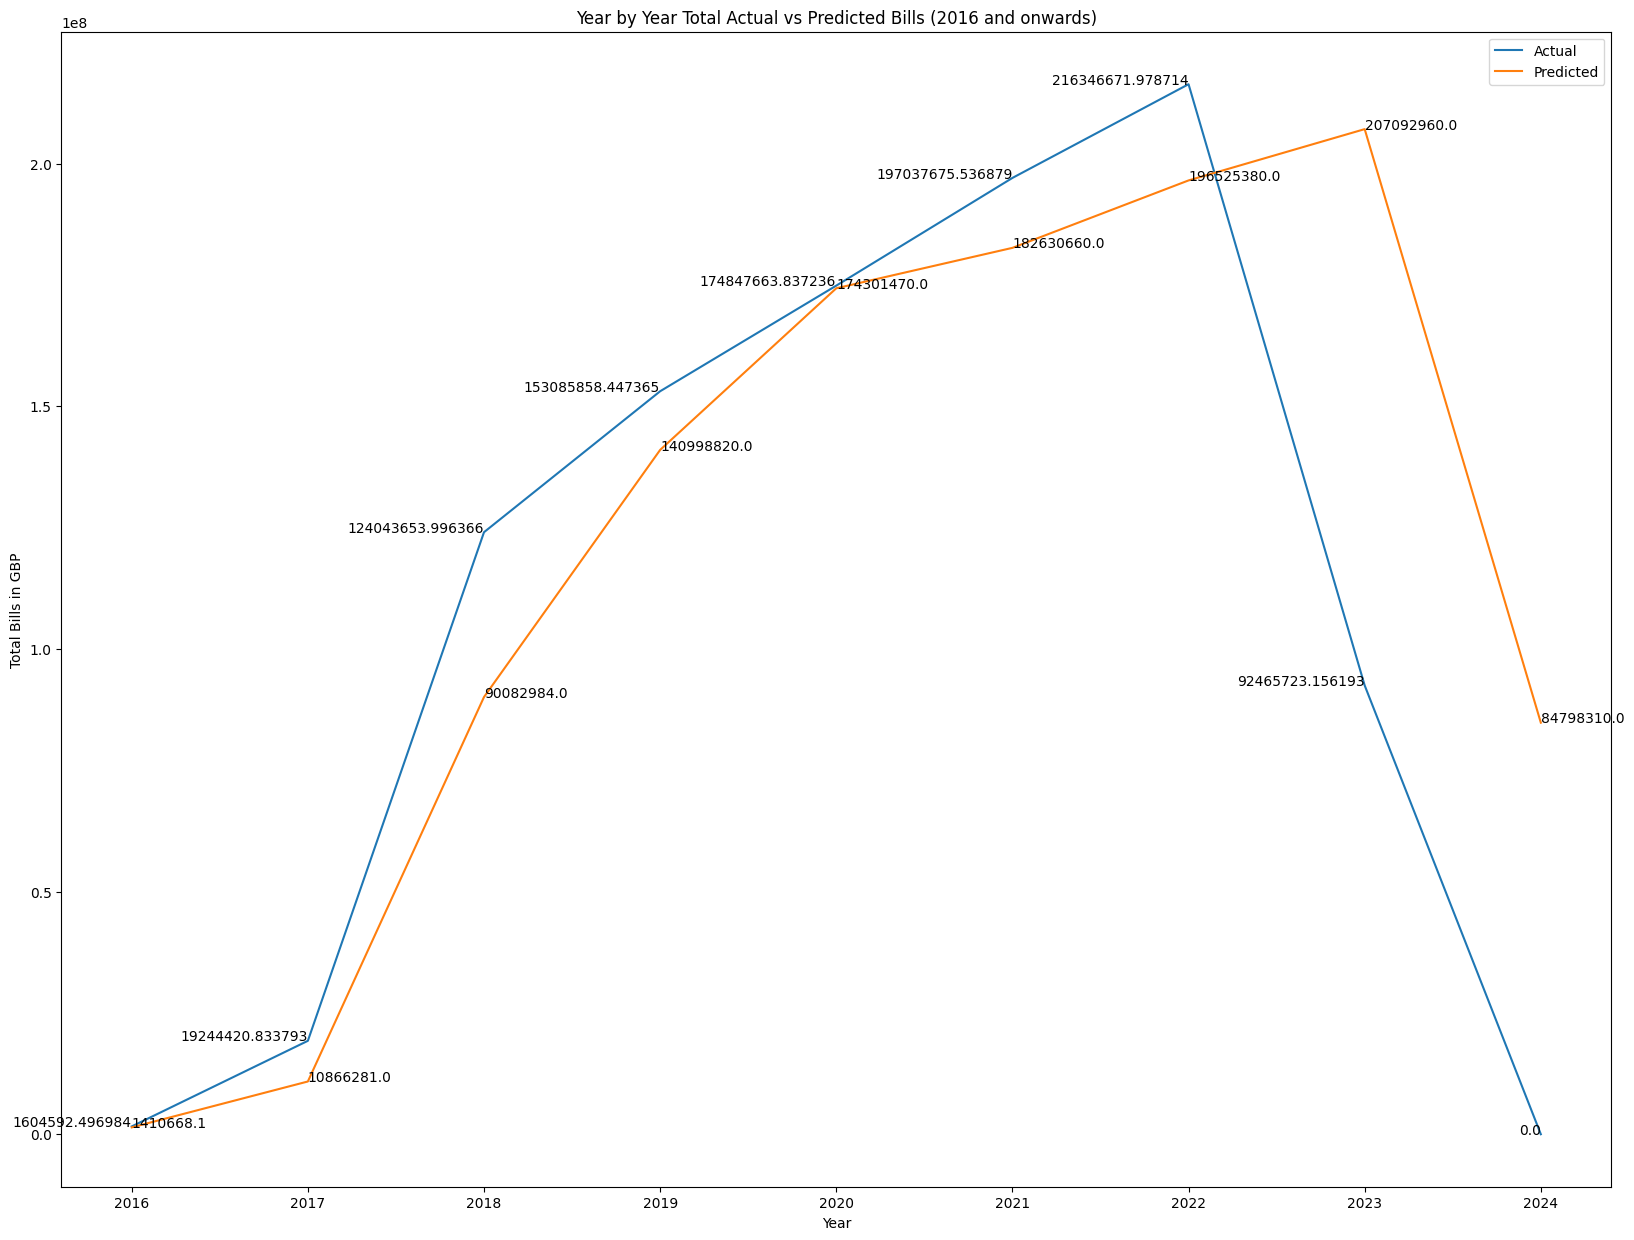

In [ ]:
# Create a new DataFrame with 'bill_year' shifted forward
df_shifted = df_copy.copy()
df_shifted['bill_year'] += 1

# Filter data from 2016 and onwards, and sum by 'bill_year'
grouped_df = df_shifted[df_shifted['bill_year'] >= 2016].groupby('bill_year').sum().reset_index()

# Plotting
plt.figure(figsize=(20, 15))

# Plot lines
plt.plot(grouped_df['bill_year'], grouped_df['actual_next_year_bills_gbp'], label='Actual')
plt.plot(grouped_df['bill_year'], grouped_df['predicted_next_year_bills_gbp'], label='Predicted')

# Add labels for each point
for i in range(len(grouped_df)):
    plt.text(grouped_df['bill_year'][i], grouped_df['actual_next_year_bills_gbp'][i], grouped_df['actual_next_year_bills_gbp'][i], ha = 'right')
    plt.text(grouped_df['bill_year'][i], grouped_df['predicted_next_year_bills_gbp'][i], grouped_df['predicted_next_year_bills_gbp'][i], ha = 'left')

# Enhance xticks
plt.xticks(grouped_df['bill_year'])

plt.xlabel('Year')
plt.ylabel('Total Bills in GBP')
plt.title('Year by Year Total Actual vs Predicted Bills (2016 and onwards)')
plt.legend()

plt.savefig("0.14.Year by Year Total Actual vs Predicted Bills.png", dpi=300)
plt.show()

## 7.4 Feature Importance

In [ ]:
def permutation_importance(model, X_test, y_test):
    baseline = mean_squared_error(y_test, model.predict(X_test)) # you can use other metrics like r2_score
    imp = []

    # Iterate over all features
    for col in X_test.columns:
        save = X_test[col].copy()
        X_test[col] = np.random.permutation(X_test[col])
        m = mean_squared_error(y_test, model.predict(X_test))
        X_test[col] = save
        imp.append(baseline - m)

    return np.array(imp)

# Calculate permutation feature importance for the entire dataset
importances_full = permutation_importance(model, X, y)

1513/1513 [==============================] - 2s 1ms/step


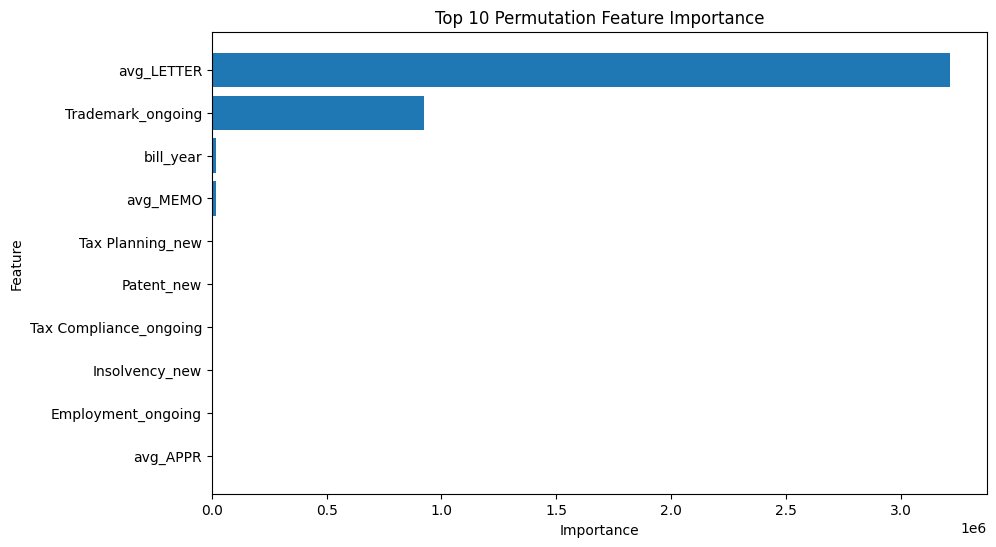

In [ ]:
# Get the indices of the sorted importances
indices = np.argsort(importances_full)

# Get the top 10 indices
top_indices = indices[-10:]

# Get the names of the top features
top_features = X_test.columns[top_indices]

# Get the top importances
top_importances = importances_full[top_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features)), top_importances)
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Permutation Feature Importance')

plt.savefig("0.15.Top 10 Permutation Feature Importance.png", dpi=300)

plt.show()

## 7.5 Re-add identification columns and decode columns

In [ ]:
# Make sure the indexes match
df_copy.index = df_ids.index

# Merge the df_ids back into the main df
df_copy = df_copy.merge(df_ids, left_index=True, right_index=True)


In [ ]:
df_copy

,bill_year,PartyType,FEESBILLEDGBP,HOURSBILLED,actual_next_year_bills_gbp,avg_TotalDocumentsCreated,number_of_ongoing_matters,number_of_new_matters,Aviation_ongoing,Banking_ongoing,Commercial_ongoing,Condor_ongoing,Corporate_ongoing,Design_ongoing,Employment_ongoing,Energy_ongoing,Financial Services_ongoing,Fundraising_ongoing,Insolvency_ongoing,Litigation_ongoing,M&A_ongoing,Media_ongoing,Medical Negligence_ongoing,Miscellaneous_ongoing,Non-Billable_ongoing,Patent_ongoing,Personal Injury_ongoing,Property_ongoing,Renewables_ongoing,Tax Compliance_ongoing,Tax Planning_ongoing,Telecoms_ongoing,Trademark_ongoing,Aviation_new,Banking_new,Commercial_new,Condor_new,Corporate_new,Design_new,Employment_new,Energy_new,Financial Services_new,Fundraising_new,Insolvency_new,Litigation_new,M&A_new,Media_new,Medical Negligence_new,Miscellaneous_new,Non-Billable_new,Patent_new,Personal Injury_new,Property_new,Renewables_new,Tax Compliance_new,Tax Planning_new,Telecoms_new,Trademark_new,number_of_ongoing_matters_types,number_of_new_matters_types,avg_E-MAIL,avg_DOC,avg_BILL,avg_LETTER,avg_ATTEND,avg_SPR,avg_FORM,avg_MEMO,avg_PROCEEDING,avg_MEDIA,avg_PRESENTATION,avg_BIBLE,avg_PUBLICATION,avg_BUS,avg_APPR,avg_TENDER,avg_POLICY,office_code,predicted_next_year_bills_gbp,ACCOUNTNUM
0,2018,1,14245.388960,121.1,25452.569563,37.277778,9,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,32.222222,4.500000,0.388889,0.000000,0.0,0.000000,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,12695.490234,BE01-000030
1,2019,1,25452.569563,76.8,2398.168500,37.277778,16,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,32.222222,4.500000,0.388889,0.000000,0.0,0.000000,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,15097.881836,BE01-000030
2,2020,1,2398.168500,0.0,0.000000,37.277778,14,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,25,32.222222,4.500000,0.388889,0.000000,0.0,0.000000,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1219.393188,BE01-000030
3,2022,1,0.000000,0.0,0.000000,37.277778,15,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,32.222222,4.500000,0.388889,0.000000,0.0,0.000000,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4081.525391,BE01-000030
4,2018,1,52390.500269,320.8,321936.618666,121.108696,15,15,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,109.739130,10.413043,0.500000,0.130435,0.0,0.021739,0.0,0.108696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,44901.296875,BE01-000040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54716,2023,1,14322.302547,32.7,0.000000,84.000000,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,73.000000,3.000000,4.000000,3.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,7340.872559,US01-2000538
54717,2023,1,9228.568806,24.9,0.000000,45.000000,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
# Create a decoding dictionary by swapping keys and values in encoding_dict
decoding_dict = {v: k for k, v in encoding_dict.items()}

# Decode 'PartyType' column
df_copy['PartyType'] = df_copy['PartyType'].replace(decoding_dict)

In [ ]:
# Get original office code values from encoded ones
df_copy['office_code'] = le.inverse_transform(df['office_code'])


## 7.6 Reorder columns

In [ ]:
# list of column names in the order you want them
new_order = ['ACCOUNTNUM', 'office_code', 'bill_year', 'PartyType', 'HOURSBILLED', 'FEESBILLEDGBP',
             'actual_next_year_bills_gbp', 'predicted_next_year_bills_gbp', 'number_of_ongoing_matters', 'number_of_new_matters',
            'number_of_ongoing_matters_types','number_of_new_matters_types']

# get the rest of the columns
rest_of_columns = [c for c in df_copy.columns if c not in new_order]

# concatenate the two lists
new_order = new_order + rest_of_columns

# rearrange the columns
df_copy = df_copy[new_order]

In [ ]:
df_copy = df_copy.rename(columns={'FEESBILLEDGBP': 'actual_current_year_bills_gbp'})


In [ ]:
df_copy

,ACCOUNTNUM,office_code,bill_year,PartyType,HOURSBILLED,actual_current_year_bills_gbp,actual_next_year_bills_gbp,predicted_next_year_bills_gbp,number_of_ongoing_matters,number_of_new_matters,number_of_ongoing_matters_types,number_of_new_matters_types,avg_TotalDocumentsCreated,Aviation_ongoing,Banking_ongoing,Commercial_ongoing,Condor_ongoing,Corporate_ongoing,Design_ongoing,Employment_ongoing,Energy_ongoing,Financial Services_ongoing,Fundraising_ongoing,Insolvency_ongoing,Litigation_ongoing,M&A_ongoing,Media_ongoing,Medical Negligence_ongoing,Miscellaneous_ongoing,Non-Billable_ongoing,Patent_ongoing,Personal Injury_ongoing,Property_ongoing,Renewables_ongoing,Tax Compliance_ongoing,Tax Planning_ongoing,Telecoms_ongoing,Trademark_ongoing,Aviation_new,Banking_new,Commercial_new,Condor_new,Corporate_new,Design_new,Employment_new,Energy_new,Financial Services_new,Fundraising_new,Insolvency_new,Litigation_new,M&A_new,Media_new,Medical Negligence_new,Miscellaneous_new,Non-Billable_new,Patent_new,Personal Injury_new,Property_new,Renewables_new,Tax Compliance_new,Tax Planning_new,Telecoms_new,Trademark_new,avg_E-MAIL,avg_DOC,avg_BILL,avg_LETTER,avg_ATTEND,avg_SPR,avg_FORM,avg_MEMO,avg_PROCEEDING,avg_MEDIA,avg_PRESENTATION,avg_BIBLE,avg_PUBLICATION,avg_BUS,avg_APPR,avg_TENDER,avg_POLICY
0,BE01-000030,BE01,2018,Organization,121.1,14245.388960,25452.569563,12695.490234,9,9,3,3,37.277778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.222222,4.500000,0.388889,0.000000,0.0,0.000000,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,BE01-000030,BE01,2019,Organization,76.8,25452.569563,2398.168500,15097.881836,16,7,3,2,37.277778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.222222,4.500000,0.388889,0.000000,0.0,0.000000,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BE01-000030,BE01,2020,Organization,0.0,2398.168500,0.000000,1219.393188,14,0,3,25,37.277778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.222222,4.500000,0.388889,0.000000,0.0,0.000000,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BE01-000030,BE01,2022,Organization,0.0,0.000000,0.000000,4081.525391,15,1,3,1,37.277778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.222222,4.500000,0.388889,0.000000,0.0,0.000000,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BE01-000040,BE01,2018,Organization,320.8,52390.500269,321936.618666,44901.296875,15,15,3,3,121.108696,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109.739130,10.413043,0.500000,0.130435,0.0,0.021739,0.0,0.108696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54716,US01-2000538,US01,2023,Organization,32.7,14322.302547,0.000000,7340.872559,1,1,1,1,84.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73.000000,3.000000,4.000000,3.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

## 7.7 Labeling for Key Clients identification:

In [ ]:
unique_count_per_office = df_copy.groupby('office_code')['ACCOUNTNUM'].nunique()
print(unique_count_per_office)


office_code
BE01     2495
DE01     2678
DE02      121
DE03        1
FR01     1949
LU01       30
NL01      727
UK01    15733
UK04       16
UK05        7
UK06       28
US01      519
Name: ACCOUNTNUM, dtype: int64


In [ ]:
# Calculate the percentage difference and assign it to the new column
df_copy['pecentage_change_gbp'] = (df_copy['actual_next_year_bills_gbp'] - df_copy['actual_current_year_bills_gbp']) / df_copy['actual_current_year_bills_gbp']

# Replace NaN with 0 in the new column
df_copy['pecentage_change_gbp'].fillna(0, inplace=True)

# Convert the percentage to actual percentage format
df_copy['pecentage_change_gbp'] = df_copy['pecentage_change_gbp'] * 100

In [ ]:
df_copy

,ACCOUNTNUM,office_code,bill_year,PartyType,HOURSBILLED,actual_current_year_bills_gbp,actual_next_year_bills_gbp,predicted_next_year_bills_gbp,number_of_ongoing_matters,number_of_new_matters,number_of_ongoing_matters_types,number_of_new_matters_types,avg_TotalDocumentsCreated,Aviation_ongoing,Banking_ongoing,Commercial_ongoing,Condor_ongoing,Corporate_ongoing,Design_ongoing,Employment_ongoing,Energy_ongoing,Financial Services_ongoing,Fundraising_ongoing,Insolvency_ongoing,Litigation_ongoing,M&A_ongoing,Media_ongoing,Medical Negligence_ongoing,Miscellaneous_ongoing,Non-Billable_ongoing,Patent_ongoing,Personal Injury_ongoing,Property_ongoing,Renewables_ongoing,Tax Compliance_ongoing,Tax Planning_ongoing,Telecoms_ongoing,Trademark_ongoing,Aviation_new,Banking_new,Commercial_new,Condor_new,Corporate_new,Design_new,Employment_new,Energy_new,Financial Services_new,Fundraising_new,Insolvency_new,Litigation_new,M&A_new,Media_new,Medical Negligence_new,Miscellaneous_new,Non-Billable_new,Patent_new,Personal Injury_new,Property_new,Renewables_new,Tax Compliance_new,Tax Planning_new,Telecoms_new,Trademark_new,avg_E-MAIL,avg_DOC,avg_BILL,avg_LETTER,avg_ATTEND,avg_SPR,avg_FORM,avg_MEMO,avg_PROCEEDING,avg_MEDIA,avg_PRESENTATION,avg_BIBLE,avg_PUBLICATION,avg_BUS,avg_APPR,avg_TENDER,avg_POLICY,pecentage_change_gbp
0,BE01-000030,BE01,2018,Organization,121.1,14245.388960,25452.569563,12695.490234,9,9,3,3,37.277778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.222222,4.500000,0.388889,0.000000,0.0,0.000000,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.672338
1,BE01-000030,BE01,2019,Organization,76.8,25452.569563,2398.168500,15097.881836,16,7,3,2,37.277778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.222222,4.500000,0.388889,0.000000,0.0,0.000000,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-90.577892
2,BE01-000030,BE01,2020,Organization,0.0,2398.168500,0.000000,1219.393188,14,0,3,25,37.277778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.222222,4.500000,0.388889,0.000000,0.0,0.000000,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-100.000000
3,BE01-000030,BE01,2022,Organization,0.0,0.000000,0.000000,4081.525391,15,1,3,1,37.277778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.222222,4.500000,0.388889,0.000000,0.0,0.000000,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,BE01-000040,BE01,2018,Organization,320.8,52390.500269,321936.618666,44901.296875,15,15,3,3,121.108696,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109.739130,10.413043,0.500000,0.130435,0.0,0.021739,0.0,0.108696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,514.494263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54716,US01-2000538,US01,2023,Organization,32.7,14322.302547,0.000000,7340.872559,1,1,1,1,84.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73.000000,3.000

In [ ]:
# list of column names in the order you want them
new_order = ['ACCOUNTNUM', 'office_code', 'bill_year', 'PartyType', 'HOURSBILLED', 'actual_current_year_bills_gbp',
             'actual_next_year_bills_gbp', 'pecentage_change_gbp']

# get the rest of the columns
rest_of_columns = [c for c in df_copy.columns if c not in new_order]

# concatenate the two lists
new_order = new_order + rest_of_columns

# rearrange the columns
df_copy = df_copy[new_order]

In [ ]:
df_copy

,ACCOUNTNUM,office_code,bill_year,PartyType,HOURSBILLED,actual_current_year_bills_gbp,actual_next_year_bills_gbp,pecentage_change_gbp,predicted_next_year_bills_gbp,number_of_ongoing_matters,number_of_new_matters,number_of_ongoing_matters_types,number_of_new_matters_types,avg_TotalDocumentsCreated,Aviation_ongoing,Banking_ongoing,Commercial_ongoing,Condor_ongoing,Corporate_ongoing,Design_ongoing,Employment_ongoing,Energy_ongoing,Financial Services_ongoing,Fundraising_ongoing,Insolvency_ongoing,Litigation_ongoing,M&A_ongoing,Media_ongoing,Medical Negligence_ongoing,Miscellaneous_ongoing,Non-Billable_ongoing,Patent_ongoing,Personal Injury_ongoing,Property_ongoing,Renewables_ongoing,Tax Compliance_ongoing,Tax Planning_ongoing,Telecoms_ongoing,Trademark_ongoing,Aviation_new,Banking_new,Commercial_new,Condor_new,Corporate_new,Design_new,Employment_new,Energy_new,Financial Services_new,Fundraising_new,Insolvency_new,Litigation_new,M&A_new,Media_new,Medical Negligence_new,Miscellaneous_new,Non-Billable_new,Patent_new,Personal Injury_new,Property_new,Renewables_new,Tax Compliance_new,Tax Planning_new,Telecoms_new,Trademark_new,avg_E-MAIL,avg_DOC,avg_BILL,avg_LETTER,avg_ATTEND,avg_SPR,avg_FORM,avg_MEMO,avg_PROCEEDING,avg_MEDIA,avg_PRESENTATION,avg_BIBLE,avg_PUBLICATION,avg_BUS,avg_APPR,avg_TENDER,avg_POLICY
0,BE01-000030,BE01,2018,Organization,121.1,14245.388960,25452.569563,78.672338,12695.490234,9,9,3,3,37.277778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.222222,4.500000,0.388889,0.000000,0.0,0.000000,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,BE01-000030,BE01,2019,Organization,76.8,25452.569563,2398.168500,-90.577892,15097.881836,16,7,3,2,37.277778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.222222,4.500000,0.388889,0.000000,0.0,0.000000,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BE01-000030,BE01,2020,Organization,0.0,2398.168500,0.000000,-100.000000,1219.393188,14,0,3,25,37.277778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.222222,4.500000,0.388889,0.000000,0.0,0.000000,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BE01-000030,BE01,2022,Organization,0.0,0.000000,0.000000,0.000000,4081.525391,15,1,3,1,37.277778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.222222,4.500000,0.388889,0.000000,0.0,0.000000,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BE01-000040,BE01,2018,Organization,320.8,52390.500269,321936.618666,514.494263,44901.296875,15,15,3,3,121.108696,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109.739130,10.413043,0.500000,0.130435,0.0,0.021739,0.0,0.108696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54716,US01-2000538,US01,2023,Organization,32.7,14322.302547,0.000000,-100.000000,7340.872559,1,1,1,1,84.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73.

# 8. Export CSV

In [ ]:
# Export DataFrame to CSV
df_copy.to_csv('finalized_master_table.csv', index=False)